<a href="https://colab.research.google.com/github/cesarhanna/Data-Science-Projects/blob/main/Movie_Rating_Prediction_using_Ensemble_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Movie Rating Prediction using Ensemble Classifier</center>

<br>

**Author:** Cesar Hanna

**Date:** September 13, 2022

## **Introduction**

Since decades TV was and still the number 1 entertainment for a lot of people with different ages, genderes, occupations and interests.

With that, TV entertainment companies are always on the search of enhancing the viewers experience by providng suggestions and recommendations on what to watch based on the viewer's behavior. This has proven the efficiency on improving the number of viewers and the subscribers level of satisfaction.

## **The Challenge**

Keeping the customer happy and willing to invest more in the product at hand is no easy task and requires a lot of dedication and support, which in turn require time and money to invest in resources that could be challenging to acquire for many reasons.

Imagine that you hire talents to monitor viewers behavior and follow up with each and every one of them for new suggestions and recommendations, that would be almost impossible to achieve!

## **Description of the Solution**

The reason of this analysis is to avoid the human interaction as much as possible and help the recommendation mechanism to provide the right suggestions by visualizing different aspects of the users behavior and predict the user ratings of movie genres, based on different independent varibales that will be described in details in the next sections.

This analysis will include different data frames and visualization methods in order to achieve the required target, and that is the viewers recommendation for each of the different groups that will be extracted from the data set.

## **Description of Data**

The data extracted will contain the following variables. Of course not all of them will be used for analysis, however, the ones that will be used are described in the Decision Criterion section.

- User_ID
- Gender
- Age_Range
- Occupation
- Zip_Code
- Timestamp
- Movie_ID
- Title
- Genres
- Rating

Value description of some of the above variables:
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:
 - 1:  "Under 18"
 - 18:  "18-24"
 - 25:  "25-34"
 - 35:  "35-44"
 - 45:  "45-49"
 - 50:  "50-55"
 - 56:  "56+"
- Occupation is chosen from the following choices:
 - 0:  "other" or not specified
 - 1:  "academic/educator"
 - 2:  "artist"
 - 3:  "clerical/admin"
 - 4:  "college/grad student"
 - 5:  "customer service"
 - 6:  "doctor/health care"
 - 7:  "executive/managerial"
 - 8:  "farmer"
 - 9:  "homemaker"
 - 10:  "K-12 student"
 - 11:  "lawyer"
 - 12:  "programmer"
 - 13:  "retired"
 - 14:  "sales/marketing"
 - 15:  "scientist"
 - 16:  "self-employed"
 - 17:  "technician/engineer"
 - 18:  "tradesman/craftsman"
 - 19:  "unemployed"
 - 20:  "writer"

## **Data References**

- https://www.lafabbricadellarealta.com/open-data-entertainment/
- https://grouplens.org/datasets/movielens/

## **Recommendation Criterion**

The end result of the analysis will be to predict the ratings of each movie genre predicted by the users based on certain features.

Predicting the ratings will be the basic of recommending movies, by defining a certain rating threshold, howver, this is not part of this notebook.

The most important features that will be used are:
- Gender
- Age_Range
- Occupation
- Genre

The target will be:
- Rating

## **Data Frames**

- **Step 1**: Importing and installing all the necessary libraries and packages
- **Step 2**: Reading all the data sets extracted from the aforementioned data references into data frames
- **Step 3**: Data wrangling - editing and cleaning-up
- **Step 4**: Merging the data frames and creating the feautes dataframe and the target dataframe

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 1: Importing and installing all the necessary libraries and packages**

In [ ]:
#Library for data analsysis
import pandas as pd

#Library to handle data in a vectorized manner
import numpy as np

#Matplotlib library used for plotting different types of plots
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn used to plot a type of histogram and scatter plot
import seaborn as sns

print('Libraries are imported!')

Libraries are imported!


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 2: Reading all the data sets extracted from the aforementioned data references into data frames**

In [ ]:
import pandas as pd

df_users = pd.read_csv('users.csv')
df_users

,User_ID,Gender,Age_Range,Occupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [ ]:
df_movies = pd.read_csv('movies.csv', encoding='latin-1')
df_movies

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings

,User_ID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 3: Data wrangling - editing and cleaning-up**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dropping the "Timestamp" and "Zip_Code" variables as they are not relevant in the analysis

In [ ]:
df_users_updated = df_users.drop(['Zip_Code'], axis=1)
df_users_updated.head()

,User_ID,Gender,Age_Range,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20


In [ ]:
df_ratings_updated = df_ratings.drop(['Timestamp'], axis=1)
df_ratings_updated.head()

,User_ID,Movie_ID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 4: Merging the data frames**

In [ ]:
#Merging first df_users_updated and df_movies
df_users_info = df_ratings_updated[['User_ID']].merge(df_users_updated[['User_ID', 'Gender', 'Age_Range', 'Occupation']], on=['User_ID'], how='left')
df_users_info

,User_ID,Gender,Age_Range,Occupation
0,1,F,1,10
1,1,F,1,10
2,1,F,1,10
3,1,F,1,10
4,1,F,1,10
...,...,...,...,...
1000204,6040,M,25,6
1000205,6040,M,25,6
1000206,6040,M,25,6
1000207,6040,M,25,6


In [ ]:
df_movie_info = df_ratings_updated[['User_ID', 'Movie_ID', 'Rating']].merge(df_movies[['Movie_ID', 'Title', 'Genres']], on=['Movie_ID'], how='left')
df_movie_info

,User_ID,Movie_ID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,My Fair Lady (1964),Musical|Romance
3,1,3408,4,Erin Brockovich (2000),Drama
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,Sophie's Choice (1982),Drama


In [ ]:
#Merging df_users_info and df_movie_info and converting the dataframe into a dictionary to get rid of the duplicated column(s)
df_merged = pd.concat([df_movie_info, df_users_info], axis=1)
df_merged_dict = df_merged.to_dict()

/tmp/ipykernel_9245/1427433901.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  df_merged_dict = df_merged.to_dict()


In [ ]:
#Converting the dictionary back to a dataframe free of duplicated columns
df_merged_updated = pd.DataFrame(df_merged_dict)
df_merged_updated

,User_ID,Movie_ID,Rating,Title,Genres,Gender,Age_Range,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),Comedy,M,25,6
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War,M,25,6
1000206,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6
1000207,6040,1096,4,Sophie's Choice (1982),Drama,M,25,6


In [ ]:
df_merged_updated_grouped = df_merged_updated.groupby(['User_ID', 'Gender', 'Age_Range', 'Occupation', 'Genres']).mean().reset_index()
df_merged_updated_grouped['Rating'] = df_merged_updated_grouped['Rating'].astype(int)
df_merged_updated_grouped

,User_ID,Gender,Age_Range,Occupation,Genres,Movie_ID,Rating
0,1,F,1,10,Action|Adventure|Comedy|Romance,1197.000000,3
1,1,F,1,10,Action|Adventure|Drama,1287.000000,5
2,1,F,1,10,Action|Adventure|Fantasy|Sci-Fi,260.000000,4
3,1,F,1,10,Action|Crime|Romance,2692.000000,4
4,1,F,1,10,Action|Drama|War,2028.000000,5
...,...,...,...,...,...,...,...
352315,6040,M,25,6,Sci-Fi,1471.666667,4
352316,6040,M,25,6,Sci-Fi|Thriller,1921.000000,4
352317,6040,M,25,6,Sci-Fi|War,750.000000,5
352318,6040,M,25,6,Thriller,2198.000000,4


The above grouped dataset shows the rating mean of each genre per user; with this appraoch I am reducing the number of records from a million to around 350K, and that would help extensively when fitting the model later on.

In [ ]:
#Dropping the Movie_ID and User_ID columns
df_merged_updated_grouped_drop = df_merged_updated_grouped.drop(['User_ID', 'Movie_ID'], axis=1)
df_merged_updated_grouped_drop

,Gender,Age_Range,Occupation,Genres,Rating
0,F,1,10,Action|Adventure|Comedy|Romance,3
1,F,1,10,Action|Adventure|Drama,5
2,F,1,10,Action|Adventure|Fantasy|Sci-Fi,4
3,F,1,10,Action|Crime|Romance,4
4,F,1,10,Action|Drama|War,5
...,...,...,...,...,...
352315,M,25,6,Sci-Fi,4
352316,M,25,6,Sci-Fi|Thriller,4
352317,M,25,6,Sci-Fi|War,5
352318,M,25,6,Thriller,4


Next, I wanted to bring the challenge from having a target with multiple labels to a multi-class target with binary labels in each class. There are many reasons for that, one part is to improve the accuracy and the other part is empirical; I have tried many clustering models such as Kmeans, Knn and MLKnn but I got a poor accuracy. In addition, I tried DBSCAN and ran into a computational problem where the kernel crashed several times. Taking all the experimented approaches that went far beyond the aforementioned ones unsuccessfuly, I decided to bring the challenge to a binary model.

I transposed each rating into a separate class; class1=Rating_1, class2=Rating_2, class3=Rating_3, class=Rating_4 and class5=Rating_5

In [ ]:
df_merged_updated_grouped_drop['Rating'] = df_merged_updated_grouped_drop['Rating'].astype(int)
final_df = pd.concat([df_merged_updated_grouped_drop, pd.get_dummies(df_merged_updated_grouped_drop['Rating'])], axis=1)
final_df = final_df.drop(['Rating'], axis=1)
final_df

,Gender,Age_Range,Occupation,Genres,1,2,3,4,5
0,F,1,10,Action|Adventure|Comedy|Romance,0,0,1,0,0
1,F,1,10,Action|Adventure|Drama,0,0,0,0,1
2,F,1,10,Action|Adventure|Fantasy|Sci-Fi,0,0,0,1,0
3,F,1,10,Action|Crime|Romance,0,0,0,1,0
4,F,1,10,Action|Drama|War,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
352315,M,25,6,Sci-Fi,0,0,0,1,0
352316,M,25,6,Sci-Fi|Thriller,0,0,0,1,0
352317,M,25,6,Sci-Fi|War,0,0,0,0,1
352318,M,25,6,Thriller,0,0,0,1,0


Creating the features:

In [ ]:
# Features
X = df_merged_updated_grouped_drop.drop(['Rating'], axis=1)
X

,Gender,Age_Range,Occupation,Genres
0,F,1,10,Action|Adventure|Comedy|Romance
1,F,1,10,Action|Adventure|Drama
2,F,1,10,Action|Adventure|Fantasy|Sci-Fi
3,F,1,10,Action|Crime|Romance
4,F,1,10,Action|Drama|War
...,...,...,...,...
352315,M,25,6,Sci-Fi
352316,M,25,6,Sci-Fi|Thriller
352317,M,25,6,Sci-Fi|War
352318,M,25,6,Thriller


Creating the multi-class target:

In [ ]:
# Target
y = final_df.drop(['Gender', 'Age_Range', 'Occupation', 'Genres'], axis=1)
y = y.rename(columns={1: 'Rating_1', 2: 'Rating_2', 3: 'Rating_3', 4: 'Rating_4', 5: 'Rating_5'})
y

,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
352315,0,0,0,1,0
352316,0,0,0,1,0
352317,0,0,0,0,1
352318,0,0,0,1,0


## **Model selection and fitting**

Splitting the dataset into training and testing. I chose 80% of the data for fitting and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
X_train

,Gender,Age_Range,Occupation,Genres
261462,M,35,7,Drama
265995,F,25,14,Comedy|Horror|Musical
217634,M,50,0,Drama|War
168748,M,25,0,Crime|Drama
309737,M,25,2,Thriller
...,...,...,...,...
107578,M,56,7,Children's|Drama|Fantasy|Sci-Fi
94601,M,50,13,Drama
115144,M,35,5,Action|Romance
129384,M,35,1,Mystery|Sci-Fi|Thriller


In [ ]:
X_test

,Gender,Age_Range,Occupation,Genres
317110,M,35,7,Adventure|Drama
125465,M,25,0,Musical|Romance
320140,F,25,4,Animation|Comedy
287273,M,25,7,Documentary
118340,M,18,4,Action|Adventure|Comedy|Sci-Fi
...,...,...,...,...
259801,M,25,14,Film-Noir|Thriller
234513,M,25,0,Drama|Mystery|Thriller
295249,M,25,14,Action|Drama|Thriller
334434,M,45,15,Adventure|Comedy|Drama


In [ ]:
y_train

,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
261462,0,0,0,0,1
265995,0,0,1,0,0
217634,0,0,1,0,0
168748,0,0,1,0,0
309737,0,0,1,0,0
...,...,...,...,...,...
107578,0,0,0,0,1
94601,0,0,1,0,0
115144,0,0,1,0,0
129384,0,0,1,0,0


In [ ]:
y_test

,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
317110,0,0,0,0,1
125465,0,0,0,1,0
320140,0,1,0,0,0
287273,0,0,1,0,0
118340,0,0,1,0,0
...,...,...,...,...,...
259801,0,0,0,1,0
234513,0,0,0,1,0
295249,0,0,0,1,0
334434,0,0,0,1,0


Next, I will convert the categorical features to numerical so the model can be trained:

In [ ]:
X_train['Gender'].replace(to_replace=['M','F'], value=[0,1], inplace=True)
X_test['Gender'].replace(to_replace=['M','F'], value=[0,1], inplace=True)

X_train['Genres'] = X_train[['Genres']].copy(deep=True)
X_train['Genres'] = X_train['Genres'].astype('category')
X_train['Genres'] = X_train['Genres'].cat.codes

X_test['Genres'] = X_test[['Genres']].copy(deep=True)
X_test['Genres'] = X_test['Genres'].astype('category')
X_test['Genres'] = X_test['Genres'].cat.codes

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/tmp/ipykernel_9245/404534004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Genres'] = X_train[['Genres']].copy(deep=True)
/tmp/ipykernel_9245/404534004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Now, the data will be normalized:

In [ ]:
# Normalization
from sklearn import preprocessing

X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_train_norm

,Gender,Age_Range,Occupation,Genres
0,-0.562654,0.427148,-0.181702,0.967489
1,1.777291,-0.402695,0.901977,0.499687
2,-0.562654,1.671913,-1.265382,1.223667
3,-0.562654,-0.402695,-1.265382,0.722450
4,-0.562654,-0.402695,-0.955759,1.624640
...,...,...,...,...
281851,-0.562654,2.169819,-0.181702,0.187818
281852,-0.562654,1.671913,0.747166,0.967489
281853,-0.562654,0.427148,-0.491325,-0.781201
281854,-0.562654,0.427148,-1.110571,1.513259


In [ ]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)
X_test_norm

,Gender,Age_Range,Occupation,Genres
0,-0.562643,0.425140,-0.177773,-0.289156
1,-0.562643,-0.404572,-1.262890,1.433839
2,1.777325,-0.404572,-0.642823,0.026163
3,-0.562643,-0.404572,-0.177773,0.927076
4,-0.562643,-0.985370,-0.642823,-1.550433
...,...,...,...,...
70459,-0.562643,-0.404572,0.907344,1.332486
70460,-0.562643,-0.404572,-1.262890,1.107258
70461,-0.562643,-0.404572,0.907344,-0.908533
70462,-0.562643,1.254852,1.062361,-0.345463


The next part will be the model selection and fitting. As mentioned before, I wanted to convert the problem to binary and run a binary classifier. The approach is to:


*   Create a seperate target out of each class
*   Train 5 sub-models by using the features training set against each of the targets separately using Support Vector Machine Classifier
*   Group all the sub-models in an Ensemble and visualize its accuracy





In [ ]:
y_train_1 = y_train.drop(['Rating_2',	'Rating_3',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_train_2 = y_train.drop(['Rating_1',	'Rating_3',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_train_3 = y_train.drop(['Rating_1',	'Rating_2',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_train_4 = y_train.drop(['Rating_1',	'Rating_2',	'Rating_3',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_train_5 = y_train.drop(['Rating_1',	'Rating_2',	'Rating_3',	'Rating_4'], axis=1, index=None).reset_index(drop=True)

In [ ]:
y_test_1 = y_test.drop(['Rating_2',	'Rating_3',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_test_2 = y_test.drop(['Rating_1',	'Rating_3',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_test_3 = y_test.drop(['Rating_1',	'Rating_2',	'Rating_4',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_test_4 = y_test.drop(['Rating_1',	'Rating_2',	'Rating_3',	'Rating_5'], axis=1, index=None).reset_index(drop=True)
y_test_5 = y_test.drop(['Rating_1',	'Rating_2',	'Rating_3',	'Rating_4'], axis=1, index=None).reset_index(drop=True)

In [ ]:
#Converting the training and testing sets into arrays
X_train_norm_array = X_train_norm.values
X_test_norm_array = X_test_norm.values

y_train_1_array = y_train_1.values.ravel()
y_train_2_array = y_train_2.values.ravel()
y_train_3_array = y_train_3.values.ravel()
y_train_4_array = y_train_4.values.ravel()
y_train_5_array = y_train_5.values.ravel()

In [ ]:
from sklearn import svm

# Sub-Model 1
Classifier_SVM_1 = svm.SVC(kernel='linear')
sub_model_SVM_1 = Classifier_SVM_1.fit(X_train_norm_array, y_train_1_array)

In [ ]:
# Sub-Model 2
Classifier_SVM_2 = svm.SVC(kernel='linear')
sub_model_SVM_2 = Classifier_SVM_2.fit(X_train_norm_array, y_train_2_array)

In [ ]:
# Sub-Model 3
Classifier_SVM_3 = svm.SVC(kernel='linear')
sub_model_SVM_3 = Classifier_SVM_3.fit(X_train_norm_array, y_train_3_array)

In [ ]:
# Sub_Model 4
Classifier_SVM_4 = svm.SVC(kernel='linear')
sub_model_SVM_4 = Classifier_SVM_4.fit(X_train_norm_array, y_train_4_array)

In [ ]:
# Sub-Model 5
Classifier_SVM_5 = svm.SVC(kernel='linear')
sub_model_SVM_5 = Classifier_SVM_5.fit(X_train_norm_array, y_train_5_array)

In [ ]:
# Appending each target class in a single target list which will be looped in for evaluation purposes in the next cell
y_df_list = [y_train_1, y_train_2, y_train_3, y_train_3, y_train_4, y_train_5]

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('svm1', sub_model_SVM_1))
	models.append(('svm2', sub_model_SVM_2))
	models.append(('svm3', sub_model_SVM_3))
	models.append(('svm4', sub_model_SVM_4))
	models.append(('svm5', sub_model_SVM_5))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['svm1'] = sub_model_SVM_1
	models['svm2'] = sub_model_SVM_2
	models['svm3'] = sub_model_SVM_3
	models['svm4'] = sub_model_SVM_4
	models['svm5'] = sub_model_SVM_5
	models['hard_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for (name, model), (target) in zip(models.items(), y_df_list):
	scores = evaluate_model(model, X_train_norm, target)
	results.append(scores)
	names.append(name)
	print('>%s %.3f' % (name, mean(scores)))
# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (10,8)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We see that the Ensemble gave an accuracy using hard voting of **82%**, which is indeed a good result!

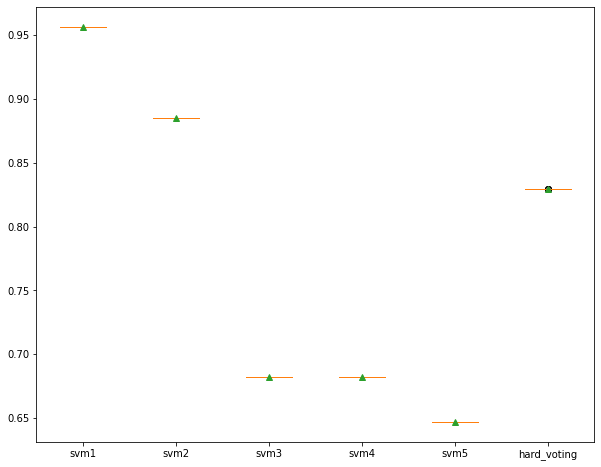